In [2]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df['target']= iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [8]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [9]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [10]:
df0= df[:50]
df1= df[50:100]
df2= df[100:]

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

### Sepal length vs Sepal Width

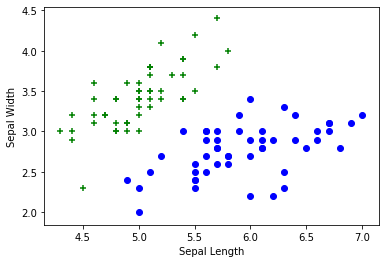

In [12]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='o')

### Petal length vs Pepal Width 

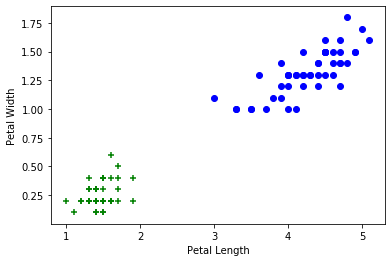

In [13]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='o')

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df.drop(['target','flower_name'], axis='columns')
y = df.target

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
len(X_train)
len(X_test)

30

In [18]:
from sklearn.svm import SVC
model= SVC()

In [19]:
model.fit(X_train,y_train)

F:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [20]:
model.score(X_test,y_test)

0.9666666666666667

## Tune parameters

### 1. Regularization (C)

In [21]:
model1 = SVC(C=1)
model1.fit(X_train, y_train)
model1.score(X_test, y_test)

F:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9666666666666667

In [22]:
model1 = SVC(C=10)
model1.fit(X_train, y_train)
model1.score(X_test, y_test)

F:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9666666666666667

In [23]:
model1 = SVC(C=100)
model1.fit(X_train, y_train)
model1.score(X_test, y_test)

F:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9

Higher the C value it affects the accuracy of model

### 2. Gamma

In [25]:
model2 = SVC(gamma=10)
model2.fit(X_train, y_train)
model2.score(X_test, y_test)

0.9

### 3. Kernel

In [27]:
model_linear_kernel = SVC(kernel='linear')
model_linear_kernel.fit(X_train, y_train)
model_linear_kernel.score(X_test, y_test)

0.9333333333333333

In [28]:
model_kernel = SVC(kernel='rbf')
model_kernel.fit(X_train, y_train)
model_kernel.score(X_test, y_test)

F:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9666666666666667